In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# A Chemist's stumble into data...

## Part1. File handling and data extraction

## Part2. Connecting predictions with progress

### Brief Description of problem and scope

In [2]:
LUMO = pd.read_csv('Data/HostLUMO_anon.csv', dtype={'StructureID':'Int64'})
print(LUMO.dtypes)
LUMO.head()

In [69]:
from scipy.stats import linregress
old_x = LUMO['SimpleQC'][LUMO['Group'] == 'old']
old_y = LUMO['Measured'][LUMO['Group'] == 'old']
b, a, r, p, se = linregress(old_x, old_y)
def baseplot(axes, x, y, a, b):
    for ax in axes:    
        scale = np.linspace(-3.0, -0.5, 51)
        ax.set_ylim(-3.5, -1.0) ; ax.set_ylabel('Measured Value / eV', fontsize=14)
        ax.set_xlim(-3.0, -0.5) ; ax.set_xlabel('Modelled Value / eV', fontsize=14)
        ax.scatter(x, y, s=100, alpha=0.7)
        ax.plot(scale, a + b * scale, 'k:')
regr = f'Regression: $r^2=${round(r**2,2)}, $p=${round(p,2)}'

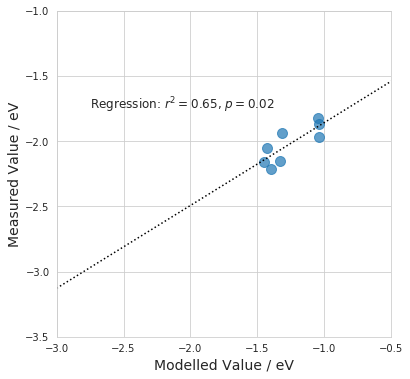

In [48]:
# Starting point for project with a handful of measured materials
fig, ax = plt.subplots(figsize=(6,6))
baseplot([ax], old_x, old_y, a, b)
ax.text(-2.75, -1.75, regr, fontsize=12);

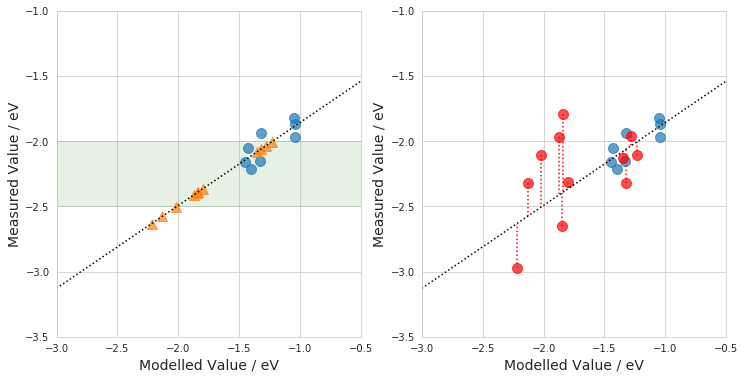

In [54]:
# Round 1 Predicted Values Are Selected for Synthesis
LUMO['Round1'] = a + b * LUMO['SimpleQC'][LUMO['Group']=='mid']
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,6))
ax1.fill_between([-3,0],[-2,-2],[-2.5,-2.5], alpha=0.1, color='g')
baseplot([ax1,ax2], old_x, old_y, a, b)
ax1.scatter(LUMO['SimpleQC'], LUMO['Round1'], marker='^', s=100, alpha=0.7)
ax2.scatter(LUMO['SimpleQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
ax2.vlines(LUMO['SimpleQC'][LUMO['Group']=='mid'],
           LUMO['Measured'][LUMO['Group']=='mid'],
           LUMO['Round1'][LUMO['Group']=='mid'], linestyles=':', colors='r');

### What's happened?!
Round 1 Materials are more structurally diverse than initial sample, giving issues with extrapolation in simple model.  *Underlying reason turns out to be related to differing degrees of structural relaxation*

More robust (and expensive!) quantum chemical methodology developed to account for relaxation and molecular environment.

In [63]:
# Reviewed regression with Multistep Model
new_x = LUMO['MultistepQC'][LUMO['Group'] != 'new']
new_y = LUMO['Measured'][LUMO['Group'] != 'new']
b2, a2, r2, p2, se2 = linregress(new_x, new_y)
regr2 = 'Regression: $r^2=${}, $p=${:0.2e}'.format(round(r2**2,2),p2)

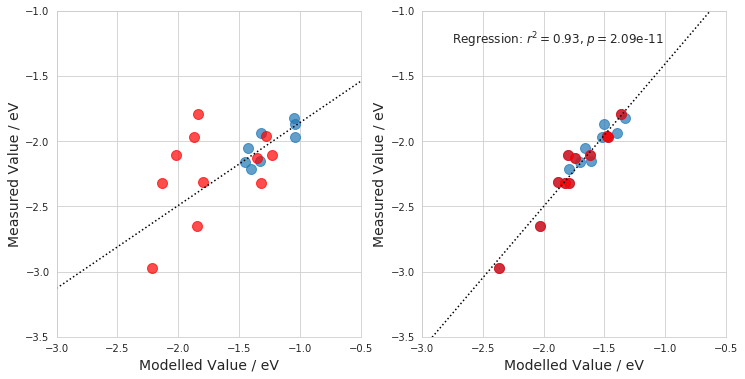

In [65]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(12,6))
baseplot([ax1], old_x, old_y, a, b)
ax1.scatter(LUMO['SimpleQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
baseplot([ax2], new_x, new_y, a2, b2)
ax2.scatter(LUMO['MultistepQC'][LUMO['Group']=='mid'],
            LUMO['Measured'][LUMO['Group']=='mid'],
            color='r', s=100, alpha=0.7)
ax2.text(-2.75, -1.25, regr2, fontsize=12);

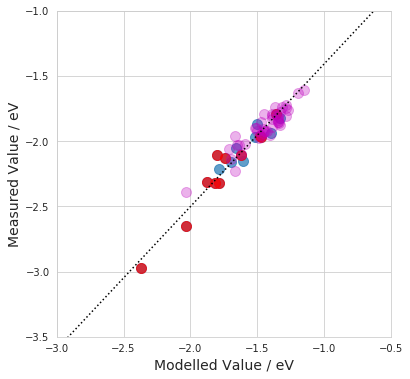

In [68]:
# Finally - further work return to original -1.5 to -2 eV range...
fig, ax = plt.subplots(figsize=(6,6))
baseplot([ax], new_x, new_y, a2, b2)
ax.scatter(LUMO['MultistepQC'][LUMO['Group']=='mid'],
           LUMO['Measured'][LUMO['Group']=='mid'],
           color='r', s=100, alpha=0.7)
ax.scatter(LUMO['MultistepQC'][LUMO['Group']=='new'],
          LUMO['Measured'][LUMO['Group']=='new'],
          color='m', s=100, alpha=0.3);

## Part3. Moving on...

### New projects in diverse areas...

Interest in new projects for Energy Materials.  Fantastic integrated weather and industrial process model from researchers at LUT, Finland, gives predictions for costs of synthetic chemicals and fuels using only [renewable resources](https://www.strommarkttreffen.org/2018-06-29_Fasihi_Synthetic_fuels&chemicals_options_and_systemic_impact.pdf)

Model clearly shows best sites are often separated from population centres $\rightarrow$ synthesis of a **transportable** fuel could allow Renewable Energy generation in areas with poor access to direct renewable electricity!

<img src="RET/NorthAfrica.png" alt="LCOE Energy in North Africa" style="width:40%;">

Idea under discussion for technical development of solution that could reduce the production cost of a particular fuel, but initial estimates compared with projected electricity markets indicate the cost of synthesis and shipping plus transport will lead to energy supply at 1.5x to 2x average wholesale price in many areas... **Does this rule out the project as viable for creating a new business?!**

## Review of example electricity market data for illustration of credible price distribution

US wholesale contract data is available from [US Energy Information Administration](https://www.eia.gov/electricity/wholesale/).  Analysis here is of 2018 data on wholesale electricity contracts reported by [Intercontinental Exchange](https://www.theice.com/index) for the trading hubs shown:

<img src="RET/hub-map.png" alt="US trading Hubs" style="width:50%;">

In [12]:
data = pd.read_csv('RET/US_2018_wholesale.csv', parse_dates=[1,2,3], thousands=',', usecols=[0,1,2,3,6,7,8])
data.head(3)

,Price hub,Trade date,Delivery start date,Delivery end date,Contract Avg Price $/MWh,Change,Daily volume MWh
0,ERCOT North 345KV Peak,2018-04-01,2018-01-05,2018-01-05,39.0,16.0,1600
1,ERCOT North 345KV Peak,2018-11-01,2018-01-12,2018-01-12,34.0,-5.0,800
2,ERCOT North 345KV Peak,2018-01-15,2018-01-16,2018-01-16,77.5,43.5,1600


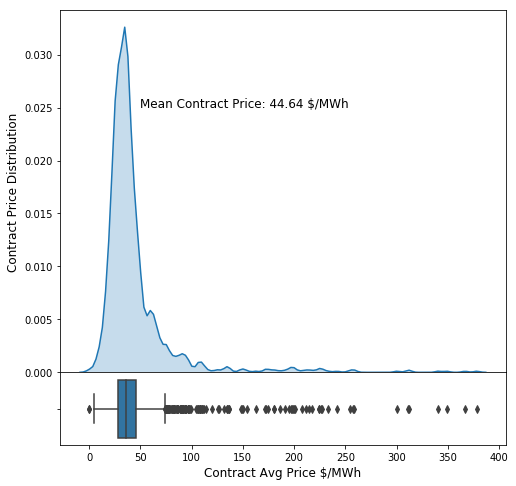

In [3]:
fig, [ax1, ax2] = plt.subplots(2,1, sharex=True,figsize=(8,8), gridspec_kw = {'height_ratios':[5,1]})
ax1.set_ylabel('Contract Price Distribution', fontsize=12)
ax1.text(s=f"Mean Contract Price: {round(data['Contract Avg Price $/MWh'].mean(),2)} $/MWh",
        x=50, y=0.025, fontsize=12)
ax2.xaxis.label.set_fontsize(12)
fig.subplots_adjust(hspace=0)
sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax1, bw='silverman', legend=False) #note, silverman probably over-smooth
sns.boxplot(data['Contract Avg Price $/MWh'], ax=ax2);

Reported data represents average contract value, independent of delivered volume.  Given that contracts vary in size, it is more useful to consider the quantities of energy supplied and the value of contracts...

In [4]:
data['Contract Days'] = (data['Delivery end date'] - data['Delivery start date']).dt.days + 1
data['Total Delivered'] = data['Daily volume MWh'] * data['Contract Days']
data['Contract Value'] = data['Contract Avg Price $/MWh'] * data['Total Delivered']
print('Power Weighted Mean Contract Price:',
       round((data['Contract Avg Price $/MWh'] * data['Total Delivered']).sum() / data['Total Delivered'].sum(), 2),
     '$/MWh')

Power Weighted Mean Contract Price: 42.86 $/MWh


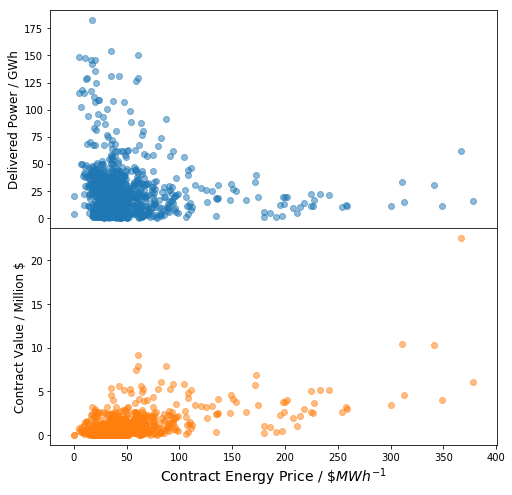

In [5]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(8,8), sharex=True)
fig.subplots_adjust(hspace=0)
ax1.set_ylabel('Delivered Power / GWh', fontsize=12)
ax2.set_xlabel(r'Contract Energy Price / $\$MWh^{-1}$', fontsize=14)
ax2.set_ylabel('Contract Value / Million $', fontsize=12)
ax1.scatter(data['Contract Avg Price $/MWh'], data['Total Delivered'] / 1000, color='tab:blue', alpha=0.5)
ax2.scatter(data['Contract Avg Price $/MWh'], data['Contract Value'] / 1000000, color='tab:orange', alpha=0.5);

### Use Weighted kde for assessment of contracts adjusted by delivered power

Matplotlib/Seaborn libraries do not have builtin weighted kde functions (as far as I know?!).  Weighted GaussianKDE is available in Scipy Stats v1.2.0+

In [6]:
from scipy.stats import gaussian_kde
import scipy ; print(scipy.__version__)

1.2.1


In [7]:
weighted_avg = gaussian_kde(data['Contract Avg Price $/MWh'],
                            bw_method=0.08, weights=data['Total Delivered'].astype('float64'))
def plot_weighted(data, weighted_avg):
    x = np.linspace(0,400,4001)
    fig, [ax1, ax2] = plt.subplots(2,1, sharex=True, figsize=(8,8), gridspec_kw = {'height_ratios':[5,1]})
    fig.subplots_adjust(hspace=0)
    ax1.set_ylabel('Relative Distribution', fontsize=14)
    ax2.xaxis.label.set_fontsize(14)
    ax1.plot(x, weighted_avg.pdf(x), 'k', label='Weighted by Delivered Power')
    sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax1, bw='silverman', legend=True)
    sns.boxplot(data['Contract Avg Price $/MWh'], ax=ax2)
    return fig, [ax1, ax2]

In [8]:
mean_contract = data['Contract Avg Price $/MWh'].mean()

# Integrated power weighted KDE for low & hi limits
power_low = round(weighted_avg.integrate_box_1d(1.5 * mean_contract,400), 3)
power_hi  = round(weighted_avg.integrate_box_1d(2 * mean_contract,400), 3)

# segment Contract Values above limits
total_value = data['Contract Value'].sum()
big_tail = data[data['Contract Avg Price $/MWh'] > 1.5 * mean_contract]
small_tail = data[data['Contract Avg Price $/MWh'] > 2 * mean_contract]
value_low = round(big_tail['Contract Value'].sum() / total_value, 3)
value_hi = round(small_tail['Contract Value'].sum() / total_value, 3)
print(power_low, power_hi, value_low, value_hi)

0.106 0.057 0.292 0.215


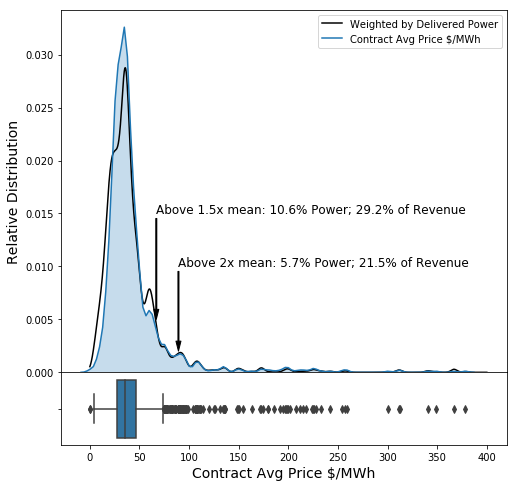

In [9]:
arrow={'facecolor': 'black', 'width': 1, 'headwidth': 5, 'headlength': 10}
fig, [ax1, ax2] = plot_weighted(data, weighted_avg)
ax1.annotate(f'Above 1.5x mean: {100*power_low}% Power; {100*value_low}% of Revenue',
             xy=(1.5*mean_contract,0.005), xytext=(1.5*mean_contract,0.015),
             arrowprops=arrow, fontsize=12)
ax1.annotate(f'Above 2x mean: {100*power_hi}% Power; {100*value_hi}% of Revenue',
            xy=(2*mean_contract,0.002), xytext=(2*mean_contract,0.01),
             arrowprops=arrow, fontsize=12);

## APPENDIX
### Estimation of bandwidth for scipy stats matching seaborn 'silverman'

(0, 150)

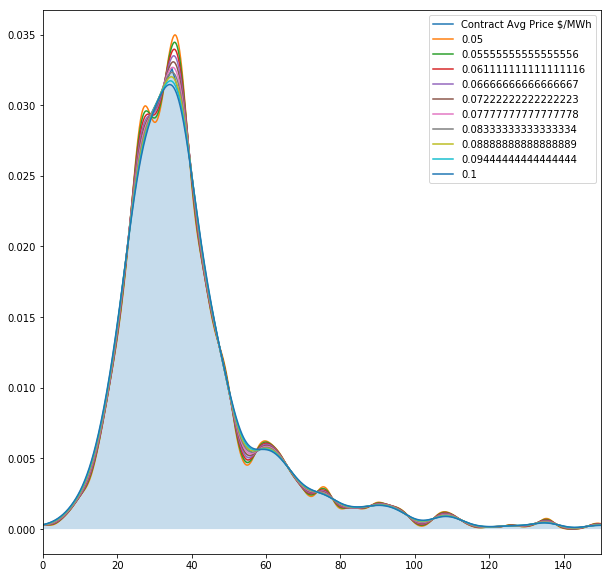

In [10]:
x = np.linspace(0,400,4001)
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data['Contract Avg Price $/MWh'], shade=True, ax=ax, bw='silverman', legend=True)
for i in np.linspace(0.05, 0.1, 10):
    k = gaussian_kde(data['Contract Avg Price $/MWh'], bw_method=i)
    ax.plot(x, k.pdf(x), label=i)
ax.legend()
ax.set_xlim(0, 150)